In [2]:
from chefboost import Chefboost as chef
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder

In [9]:
dataset = pd.read_csv("database.csv")
dataset = dataset.loc[:, dataset.columns != 'Exemplo']



In [10]:
dataset

,História de Credito,Dívida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,$0_a_$15k,Alto
1,Desconhecido,Alta,Nenhuma,$15_a_$35k,Alto
2,Desconhecido,Baixa,Nenhuma,$15_a_$35k,Moderado
3,Desconhecido,Baixa,Nenhuma,$0_a_$15k,Alto
4,Desconhecido,Baixa,Nenhuma,Acima_de_$35k,Baixo
5,Desconhecido,Baixa,Adequada,Acima_de_$35k,Baixo
6,Ruim,Baixa,Nenhuma,$0_a_$15k,Alto
7,Ruim,Baixa,Adequada,Acima_de_$35k,Moderado
8,Boa,Baixa,Nenhuma,Acima_de_$35k,Baixo
9,Boa,Alta,Adequada,Acima_de_$35k,Baixo


In [11]:
config = {'algorithm' : 'C4.5'}

In [12]:
model = chef.fit(dataset.copy(),  config = {}, target_label = 'Risco', validation_df = None)

[INFO]:  2 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  4.171976566314697  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  20  instances
Labels:  ['Alto' 'Moderado' 'Baixo' 'Alta']
Confusion matrix:  [[6, 0, 0, 0], [0, 6, 0, 0], [0, 0, 7, 0], [0, 0, 0, 1]]
Decision  Alto  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  Moderado  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  Baixo  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  Alta  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [13]:
features = ['História de Credito',	'Dívida', 'Garantia', 'Renda']
X = dataset[features]
X

,História de Credito,Dívida,Garantia,Renda
0,Ruim,Alta,Nenhuma,$0_a_$15k
1,Desconhecido,Alta,Nenhuma,$15_a_$35k
2,Desconhecido,Baixa,Nenhuma,$15_a_$35k
3,Desconhecido,Baixa,Nenhuma,$0_a_$15k
4,Desconhecido,Baixa,Nenhuma,Acima_de_$35k
5,Desconhecido,Baixa,Adequada,Acima_de_$35k
6,Ruim,Baixa,Nenhuma,$0_a_$15k
7,Ruim,Baixa,Adequada,Acima_de_$35k
8,Boa,Baixa,Nenhuma,Acima_de_$35k
9,Boa,Alta,Adequada,Acima_de_$35k


In [14]:
features2 = ['Risco']
Y = dataset[features2]
Y

,Risco
0,Alto
1,Alto
2,Moderado
3,Alto
4,Baixo
5,Baixo
6,Alto
7,Moderado
8,Baixo
9,Baixo


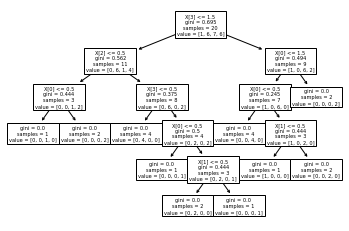

In [15]:
enc = OrdinalEncoder()
a = enc.fit_transform(X)
b = enc.fit_transform(Y)

clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(a, b)

plot_tree(clf)
plt.show()